# Assignment 16: Neural  Network (gas_turbine.csv)

# -----------------------------------------------------------------------------------------------------------

In [4]:
#IMPORTING THE PACKAGES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [5]:
gas_t = pd.read_csv('gas_turbines.csv')

In [6]:
gas_t.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [7]:
gas_t.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
# Changing position of target column 'TEY'
Target = gas_t['TEY']
#Drop the existing column
gas_t.drop(labels=['TEY'], axis=1,inplace = True)
gas_t.insert(10, 'Y', Target)

gas_t1 = gas_t.rename({'Y':'TEY'}, axis = 1)

gas_t.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,Y
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72


In [9]:
gas_t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   CDP     15039 non-null  float64
 8   CO      15039 non-null  float64
 9   NOX     15039 non-null  float64
 10  TEY     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [10]:
gas_t1.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,12.102353,1.972499,68.190934,134.188464
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,1.103196,2.222206,10.470586,15.829717
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,9.904400,0.000388,27.765000,100.170000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,11.622000,0.858055,61.303500,127.985000
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,12.025000,1.390200,66.601000,133.780000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,12.578000,2.160400,73.935500,140.895000
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,15.081000,44.103000,119.890000,174.610000


In [11]:
# Checking correlation between variables
gas_t1.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006,-0.207495
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744,0.146939
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061,-0.110272
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299,0.717995
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496,0.977042
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636,0.891587
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888,-0.720356
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103,0.988473
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743,-0.541751
NOX,-0.600006,0.256744,0.143061,-0.037299,-0.208496,-0.231636,0.009888,-0.169103,0.316743,1.000000,-0.102631


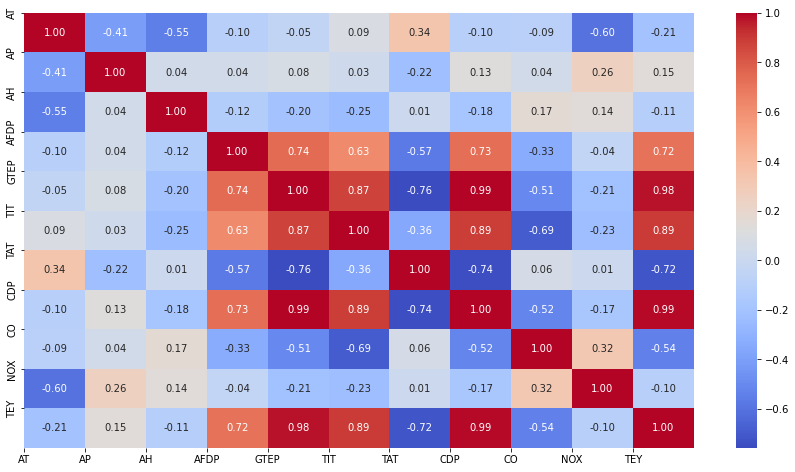

In [12]:
# Heatmap of correlation matrix
corr_m = gas_t1.corr()
fig, ax = plt.subplots(figsize=(15, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr_m, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr_m.columns)), corr_m.columns);
plt.yticks(range(len(corr_m.columns)), corr_m.columns)
plt.show()

# Splitting data into test data and train data


In [13]:
gas_t2 = gas_t1.drop(['AT','AP','AH','CO','NOX'],axis = 1)

In [14]:
gas_t2.head()

,AFDP,GTEP,TIT,TAT,CDP,TEY
0,3.5000,19.663,1059.2,550.00,10.605,114.70
1,3.4998,19.728,1059.3,550.00,10.598,114.72
2,3.4824,19.779,1059.4,549.87,10.601,114.71
3,3.4805,19.792,1059.6,549.99,10.606,114.72
4,3.4976,19.765,1059.7,549.98,10.612,114.72


In [15]:
array = gas_t2.values

In [16]:
x = array[:,:-1]
y = array[:,-1]

In [17]:
x

array([[   3.5   ,   19.663 , 1059.2   ,  550.    ,   10.605 ],
       [   3.4998,   19.728 , 1059.3   ,  550.    ,   10.598 ],
       [   3.4824,   19.779 , 1059.4   ,  549.87  ,   10.601 ],
       ...,
       [   3.477 ,   19.53  , 1037.7   ,  537.32  ,   10.483 ],
       [   3.4486,   19.377 , 1043.2   ,  541.24  ,   10.533 ],
       [   3.4275,   19.306 , 1049.9   ,  545.85  ,   10.583 ]])

In [18]:
y

array([114.7 , 114.72, 114.71, ..., 110.19, 110.74, 111.58])

In [19]:
# Splitting data into test data and train data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.3,random_state=1)
# Standardizing data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(x_train)

x_train_std = sc.transform(x_train)

sc.fit(y_train.reshape(-1, 1))

StandardScaler()

In [20]:
y_train_std = sc.transform(y_train.reshape(-1,1))

In [21]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (10527, 5)
Shape of x_test:  (4512, 5)
Shape of y_train:  (10527,)
Shape of y_test:  (4512,)


# Artificial Neural Network Model - Backpropagation

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=5, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(6, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

In [25]:
# compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [26]:
# fit the model 
model.fit(x_train,y_train, epochs=100, batch_size=40)

Epoch 1/100
264/264 [==============================] - 2s 2ms/step - loss: 21240.5898 - mse: 21240.5898
Epoch 2/100
264/264 [==============================] - 0s 2ms/step - loss: 18180.8711 - mse: 18180.8691
Epoch 3/100
264/264 [==============================] - 1s 2ms/step - loss: 18112.6621 - mse: 18112.6621
Epoch 4/100
264/264 [==============================] - 0s 2ms/step - loss: 18043.6445 - mse: 18043.6445
Epoch 5/100
264/264 [==============================] - 0s 1ms/step - loss: 17974.3320 - mse: 17974.3320
Epoch 6/100
264/264 [==============================] - 0s 1ms/step - loss: 17904.9492 - mse: 17904.9492
Epoch 7/100
264/264 [==============================] - 0s 1ms/step - loss: 17835.5723 - mse: 17835.5723
Epoch 8/100
264/264 [==============================] - 0s 1ms/step - loss: 17766.2715 - mse: 17766.2676
Epoch 9/100
264/264 [==============================] - 0s 1ms/step - loss: 17697.0586 - mse: 17697.0586
Epoch 10/100
264/264 [==============================] - 0s 1ms/s

264/264 [==============================] - 0s 1ms/step - loss: 13190.7314 - mse: 13190.7314
Epoch 80/100
264/264 [==============================] - 0s 2ms/step - loss: 13131.2637 - mse: 13131.2637
Epoch 81/100
264/264 [==============================] - 0s 2ms/step - loss: 13071.9424 - mse: 13071.9434
Epoch 82/100
264/264 [==============================] - 0s 2ms/step - loss: 13012.7529 - mse: 13012.7529
Epoch 83/100
264/264 [==============================] - 0s 2ms/step - loss: 12953.6982 - mse: 12953.6982
Epoch 84/100
264/264 [==============================] - 0s 2ms/step - loss: 12894.7871 - mse: 12894.7871
Epoch 85/100
264/264 [==============================] - 0s 2ms/step - loss: 12836.0156 - mse: 12836.0156
Epoch 86/100
264/264 [==============================] - 0s 1ms/step - loss: 12777.3926 - mse: 12777.3926
Epoch 87/100
264/264 [==============================] - 0s 2ms/step - loss: 12718.8955 - mse: 12718.8955
Epoch 88/100
264/264 [==============================] - 0s 1ms/step 

In [27]:
### evaluate the model 
score = model.evaluate(x_test,y_test)
print((model.metrics_names[1]))

141/141 [==============================] - 0s 1ms/step - loss: 11889.7637 - mse: 11889.7637
mse


# Artificial Neural Network Model - Tuning of All Hyperparameters

In [28]:
import keras

In [29]:


# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam_v2
from keras.layers import Dropout

In [30]:
X = gas_t2.iloc[:,:-1]
Y = gas_t2.iloc[:,-1]

In [31]:
# Selecting first 500 records
X= X.iloc[0:500,:]
Y = Y.iloc[0:500] 

In [32]:
# Scaling all the features
sc.fit(X)
Y = StandardScaler().fit_transform(Y.values.reshape(len(Y),1))[:,0]
scaled_features=sc.transform(X)
data_head=pd.DataFrame(scaled_features,columns=X.columns)
data_head

,AFDP,GTEP,TIT,TAT,CDP
0,-1.759902,-1.532845,-2.140879,0.597669,-1.637742
1,-1.760236,-1.516668,-2.132865,0.597669,-1.644533
2,-1.789273,-1.503977,-2.124851,0.584370,-1.641623
3,-1.792443,-1.500741,-2.108824,0.596646,-1.636771
4,-1.763907,-1.507461,-2.100811,0.595623,-1.630950
...,...,...,...,...,...
495,0.427695,0.194256,-0.706435,-0.594154,-0.072722
496,-1.244251,-1.463412,-3.919909,-0.777275,-1.760964
497,-1.300155,-1.463661,-3.984018,-0.855025,-1.660057
498,-1.030481,-1.114010,-3.463131,-0.919476,-1.255462


In [33]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [34]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of Y_train: ', Y_train.shape)
print('Shape of Y_test: ', Y_test.shape)

Shape of X_train:  (350, 5)
Shape of X_test:  (150, 5)
Shape of Y_train:  (350,)
Shape of Y_test:  (150,)


In [35]:
from sklearn.metrics import mean_squared_error


# Create model

In [36]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim = 5, kernel_initializer='he_uniform', activation = 'relu'))
    model.add(Dense(8, kernel_initializer='he_uniform', activation = 'relu'))
    model.add(Dense(1,kernel_initializer='he_uniform', activation ='linear'))
    adam = adam_v2.Adam(learning_rate = 0.01)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

In [37]:
# create the model
model = KerasClassifier(build_fn = create_model, verbose =0)

In [38]:
# Define the Gread search parameter
batch_size = [20,40]
epochs =[50,100,150]

In [39]:
# make a dictionary of the grid search parameters
para_grid = dict(batch_size = batch_size, epochs = epochs)

In [40]:
# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = para_grid, cv = KFold(), verbose =10, scoring='neg_mean_squared_error')
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START batch_size=20, epochs=50....................................
[CV 1/5; 1/6] END .batch_size=20, epochs=50;, score=-1252.918 total time=  10.8s
[CV 2/5; 1/6] START batch_size=20, epochs=50....................................
[CV 2/5; 1/6] END .batch_size=20, epochs=50;, score=-1298.022 total time=  10.1s
[CV 3/5; 1/6] START batch_size=20, epochs=50....................................
[CV 3/5; 1/6] END .batch_size=20, epochs=50;, score=-1282.501 total time=   9.9s
[CV 4/5; 1/6] START batch_size=20, epochs=50....................................
[CV 4/5; 1/6] END .batch_size=20, epochs=50;, score=-1327.467 total time=   9.9s
[CV 5/5; 1/6] START batch_size=20, epochs=50....................................
[CV 5/5; 1/6] END .batch_size=20, epochs=50;, score=-1290.662 total time=   9.8s
[CV 1/5; 2/6] START batch_size=20, epochs=100...................................
[CV 1/5; 2/6] END batch_size=20, epochs=100;, sco

In [42]:
# summarize the resulting
print('Best : {},using{},'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip (means, stds, params):
    print('{}, {} with: {}'.format(mean,stdev,param))

Best : -1290.3139152898812,using{'batch_size': 20, 'epochs': 50},
-1290.3139152898812, 24.080904038259813 with: {'batch_size': 20, 'epochs': 50}
-1290.3139152898812, 24.080904038259813 with: {'batch_size': 20, 'epochs': 100}
-1290.3139152898812, 24.080904038259813 with: {'batch_size': 20, 'epochs': 150}
-1290.3139152898812, 24.080904038259813 with: {'batch_size': 40, 'epochs': 50}
-1290.3139152898812, 24.080904038259813 with: {'batch_size': 40, 'epochs': 100}
-1290.3139152898812, 24.080904038259813 with: {'batch_size': 40, 'epochs': 150}


# Tuning hyperparameter : learning rate and Dropout

In [43]:
from keras.layers import Dropout

In [44]:
# Define the model
def create_model2(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8, input_dim = 5, kernel_initializer = 'he_normal', activation ='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, input_dim = 5, kernel_initializer = 'he_normal', activation ='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    adam = adam_v2.Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics =['accuracy'])
    return model

In [45]:
# create the model
model2 = KerasClassifier(build_fn = create_model2, verbose = 0,batch_size =20, epochs = 50) 

In [46]:
# Define the Grid search parameter
learning_rate = [0.01,0.1]
dropout_rate  = [0.1,0.2]

In [47]:
# Make a dictionary of the grid dearch parameters
params_grid = dict(learning_rate = learning_rate, dropout_rate = dropout_rate)

In [48]:
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model2, param_grid = params_grid, cv = KFold(), verbose = 10)

In [49]:
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START dropout_rate=0.1, learning_rate=0.01........................
[CV 1/5; 1/4] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=  26.0s
[CV 2/5; 1/4] START dropout_rate=0.1, learning_rate=0.01........................
[CV 2/5; 1/4] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=  25.3s
[CV 3/5; 1/4] START dropout_rate=0.1, learning_rate=0.01........................
[CV 3/5; 1/4] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=  29.1s
[CV 4/5; 1/4] START dropout_rate=0.1, learning_rate=0.01........................
[CV 4/5; 1/4] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=  28.2s
[CV 5/5; 1/4] START dropout_rate=0.1, learning_rate=0.01........................
[CV 5/5; 1/4] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=  27.6s
[CV 1/5; 2/4] START dropout_rate=0.1, learning_rate=0.1.........................
[CV 1/5; 2/4] 

In [50]:
# Summarise the results
print('Best: {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip (means, stds, params):
    print('{}, {} with: {}'.format(mean, stdev, param))

Best: 9.501187596470118e-05, using {'dropout_rate': 0.1, 'learning_rate': 0.01}
9.501187596470118e-05, 0.00019002375192940236 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
9.501187596470118e-05, 0.00019002375192940236 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
9.501187596470118e-05, 0.00019002375192940236 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
9.501187596470118e-05, 0.00019002375192940236 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


# Tunning of hyperparameter : Activation and Kernel Initializer

In [51]:
# Define the model
def create_model3 (activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 5, kernel_initializer =init,activation = activation_function))
    model.add(Dropout(0.1))            
    model.add(Dense(4, input_dim = 5, kernel_initializer =init, activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation = 'sigmoid'))
    
    adam = adam_v2.Adam(learning_rate =0.001)
    model.compile(loss= 'binary_crossentropy', optimizer = adam , metrics = ['accuracy'])
    return model

In [52]:
#  create the model
model3 =KerasClassifier(build_fn = create_model3, verbose =0, batch_size = 20, epochs =50)

In [53]:
# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

In [54]:
# make a dictionary of the grid search parameter

param_gridss = dict(activation_function = activation_function, init= init)

In [175]:
# build and fit the gridsearchcv 

grids = GridSearchCV(estimator =model3, param_grid = param_gridss , cv = KFold(), verbose = 10)
grids_results = grids.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=  31.7s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=  31.1s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=  40.2s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=  30.0s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=  34.0s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=  27.6s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=  26.3s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=  32.5s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=  27.6s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=  25.8s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=  26.3s
[CV 4/5; 11/12] START activation_f

In [177]:
# Summarise the results
print('Best: {}, using {}'.format(grids_results.best_score_,grids_results.best_params_))
means = grids_results.cv_results_['mean_test_score']
stds = grids_results.cv_results_['std_test_score']
params = grids_results.cv_results_['params']
for mean, stdev, param in zip (means, stds, params):
    print('{}, {} with: {}'.format(mean, stdev, param))

Best: 9.501187596470118e-05, using {'activation_function': 'softmax', 'init': 'uniform'}
9.501187596470118e-05, 0.00019002375192940236 with: {'activation_function': 'softmax', 'init': 'uniform'}
9.501187596470118e-05, 0.00019002375192940236 with: {'activation_function': 'softmax', 'init': 'normal'}
9.501187596470118e-05, 0.00019002375192940236 with: {'activation_function': 'softmax', 'init': 'zero'}
9.501187596470118e-05, 0.00019002375192940236 with: {'activation_function': 'relu', 'init': 'uniform'}
9.501187596470118e-05, 0.00019002375192940236 with: {'activation_function': 'relu', 'init': 'normal'}
9.501187596470118e-05, 0.00019002375192940236 with: {'activation_function': 'relu', 'init': 'zero'}
9.501187596470118e-05, 0.00019002375192940236 with: {'activation_function': 'tanh', 'init': 'uniform'}
9.501187596470118e-05, 0.00019002375192940236 with: {'activation_function': 'tanh', 'init': 'normal'}
9.501187596470118e-05, 0.00019002375192940236 with: {'activation_function': 'tanh', 'in